In [161]:
import maze_l1 as mz
import numpy as np
import importlib
importlib.reload(mz)

<module 'maze_l1' from 'c:\\Users\\MAL Sevenhuijsen\\Documents\\School\\Master\\S4\\Reinforcement learning\\Lab1\\Lab-1-Reinforcement-Learning\\maze_l1.py'>

## MDP formulation Simultaneously

#### State space $\mathcal{S}$
Within this model there are two objects that are continuously moving. Namely the player and the minotaur. The player can move in any direction (up, down, left, right) or stay in the same position. The minotaur can move in any direction (up, down, left, right). The state space is the set of all possible positions of the player and the minotaur in the maze. 

$$\mathcal{S} = \big\lbrace ((i,j), (k,l)):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle and (k,l) is not a boundary}\big\rbrace.$$

#### Action space $\mathcal{A}$
We cannot control the minotaur, but we can control the player. Therefore we have five options: move `left`, `right`, `down`, `up` and `stay`. Just like lab0 we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition probabilities $\mathcal{P}$

- At a state (or position) $s$ taking any action will always lead to a different state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = \frac{1}{m}$. This is due to the minotaur always being able to move and it not going into the walls. Note that it depends on the amount of possible moves for the minotaur, called $m$.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the minotaur.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to the minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 


## MDP formulation not simultaneously

#### State space $\mathcal{S}$
Within this model there are two objects that are continuously moving. namely the player and the minotaur. The player can move in any direction (up, down, left, right) or stay in the same position. The minotaur can move in any direction (up, down, left, right). Now the player and the minotaur move at alternating times. The state space is the set of all possible positions of the player and the minotaur in the maze. 

$$\mathcal{S} = \big\lbrace (i,j):\textrm{such that the cell
} (i,j) \textrm{ is not an obstacle }\big\rbrace.$$

#### Action space $\mathcal{A}$
We cannot control the minotaur, but we can control the player. Therefore we have five options: move `left`, `right`, `down`, `up` and `stay`. Just like lab0 we allow the player to move in all directions, and move into a "wall", but the state will not change and the reward will be a large negative number to prevent this from happening. 

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

#### Transition probabilities $\mathcal{P}$

- At a state (or position) $s$ taking any action will always lead to a different state (or position) $s'$, then $\mathbb{P}(s' \vert s, a) = 1$. As the player and the minotaur move alternatingly, we can only control the player movement. Therefore any transition to the next state has a probability of 1.

#### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles and the minotaur.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to the minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to a place where the minotaur can move in one timestep then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 


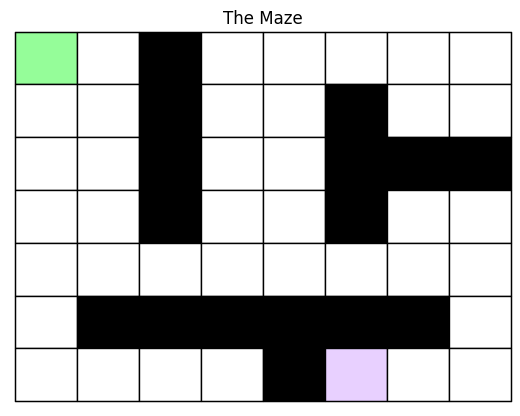

In [165]:
maze = np.array([
    [3, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

# maze = np.array([
#     [0, 0, 0],
#     [0, 1, 0],
#     [0, 0, 2]
# ])

env = mz.Maze(maze)
mz.draw_maze(maze)

In [166]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env, horizon);

In [169]:
import importlib
importlib.reload(mz)

# Simulate the shortest path starting from position A
method = 'DynProg';
path = env.simulate(policy, method);


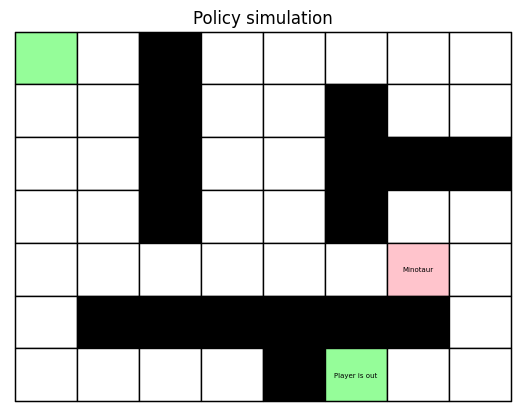

In [179]:
# Show the shortest path 
importlib.reload(mz)

mz.animate_solution(maze, path)